# Fourier downsampleing of cut fields

This document a study of data-reduction by fourier series downsampling methods. The idea is that antenna radiation patterns often are based on Sinc functions, at least locally and close to the maximum radiation intensity. 

So for a radiation pattern $U(\theta,\phi)$ with a pattern theta cut $U_c(\theta) = U(\theta,\phi = c)$ where $c$ is an arbitrary constant

$$BU_c(\theta) \approx \left(\frac{\sin(a\theta)}{a\theta}\right)^2$$


The Fourier Transform of a 
$$$$


In [46]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']


cwd = Path.cwd()
cut_folder = cwd / "Field Cut Data" / "cut_files"
log_folder = cwd / "Field Cut Data" / "log_files"
print(cwd)


C:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\Prelimary Data Analysis


Signal Power 10.365847943500238
FFT Power 8.362216504102973
46
26


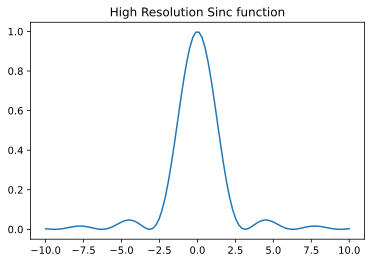

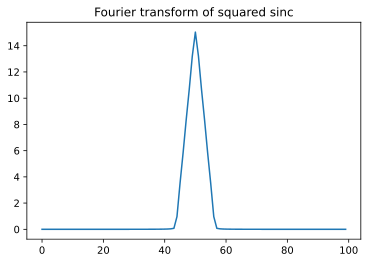

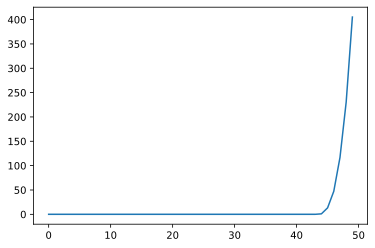

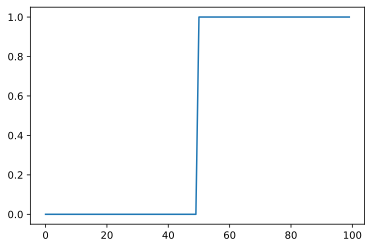

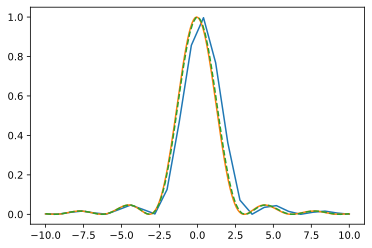

In [190]:
from scipy.fft import fft,ifft
from scipy.signal import resample

x = np.linspace(-10,10,100)
y = abs((np.sin(x)/(x))**2)
print('Signal Power', np.trapz(abs(y)**2))

##Simple squared sinc wave
plt.figure()
plt.title('High Resolution Sinc function')
plt.plot(x,y)

y_fft = fft(y)
print('FFT Power',np.trapz(abs(y_fft)**2)/len(y_fft))
plt.figure()
plt.title('Fourier transform of squared sinc')
plt.plot(np.roll(abs(y_fft),len(y_fft)//2))
shifted_fft = np.roll(abs(y_fft),len(y_fft)//2)
shifted_fft_power = shifted_fft**2;
integrated_fft_power = np.cumsum(shifted_fft)


plt.figure()
plt.plot(np.cumsum(shifted_fft_power[0:int(len(y_fft)//2)]))

plt.figure()
plt.plot(integrated_fft_power > np.trapz(shifted_fft)/2)
print(len(integrated_fft_power[integrated_fft_power < (np.trapz(shifted_fft)/2)*0.1]))


resampleNumber = len(y)-2*len(integrated_fft_power[integrated_fft_power < (np.trapz(shifted_fft)/2)*0.001])
print(resampleNumber)

y_downsample = resample(y,resampleNumber)
plt.figure()
x1 = np.linspace(-10,10,resampleNumber)
plt.plot(x1,y_downsample)
x2 = np.linspace(-10,10,200)
plt.plot(x2,resample(y_downsample,200))
plt.plot(x,y,linestyle = '--')

# Parsevals theorem based downsampler

So what if we used parsevals theorem (The idea that we can find the power of a signal in the fourier domain) to determine at which frequency a certain percentage of the power is properly respresented?

12
Power of original Signal 104.60081224841738
Power new signal 104.59899703332212


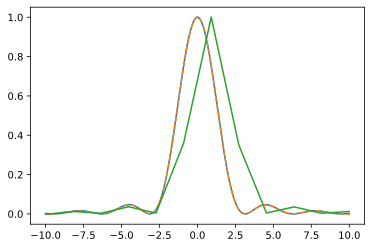

In [181]:
import scipy

x = np.linspace(-10,10,1000)
y = (np.sin(x)/x)**2

def parsevalDownsampler(y, powerLossFactor):
    
    l = len(y)
    y_fft = fft(y)
    shifted_fft = np.roll(abs(y_fft),l//2)
    y_power = y**2
    int_power = np.trapz(y_power)
    integrated_fft_power = np.cumsum(shifted_fft)
    
    N = len(y)-2*len(integrated_fft_power[integrated_fft_power < (np.trapz(shifted_fft)/2)*powerLossFactor])
    down_sampled_signal=scipy.signal.resample(y,N)
    
    
    return N,down_sampled_signal



N,y_downsample = parsevalDownsampler(y,0.01)
print(N)

plt.figure()
plt.plot(x,y)
x1 = np.linspace(-10,10,N)
plt.plot(x,resample(y_downsample,1000),linestyle = '--')
plt.plot(x1,y_downsample)

print('Power of original Signal',np.trapz(y**2))
print('Power new signal',np.trapz(resample(y_downsample,1000)**2))


In [148]:
cwd = Path.cwd()
cut_folder = cwd / "Field Cut Data" / "cut_files"
log_folder = cwd / "Field Cut Data" / "log_files"
print(cwd)
file_to_open = cut_folder / "30.cut"
V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP = np.genfromtxt(file_to_open, max_rows=1, skip_header=1)
print(V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP)
data = np.genfromtxt(file_to_open, skip_header=2,dtype = np.float32).T
print(data.shape)
thetas = np.linspace(-45.0, 45.0, int(V_NUM))
copolar = np.sqrt(data[0]**2 + data[1]**2)
xpolar = np.sqrt(data[2]**2 + data[3]**2)
copolar_dB = 10*np.log10(copolar)
xpolar_dB = 10*np.log10(xpolar)

C:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\Prelimary Data Analysis
-45.0 0.09 1001.0 0.0 3.0 1.0 2.0
(4, 1001)


Number of points 201


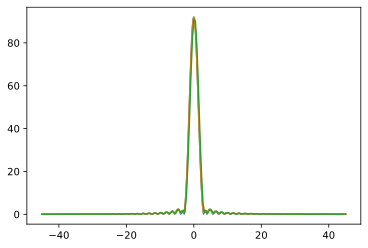

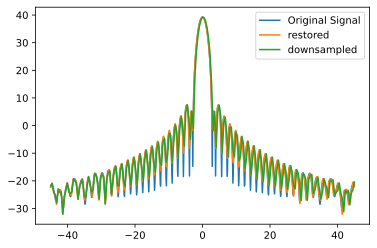

In [194]:
plt.figure()
plt.plot(thetas,copolar)

N,downsample = parsevalDownsampler(copolar,0.01)
print('Number of points',N)
plt.plot(np.linspace(-45,45,1001),resample(downsample,1001))
plt.plot(np.linspace(-45,45,N),downsample)

plt.figure()
plt.plot(thetas,20*np.log10(copolar),label = 'Original Signal')
plt.plot(np.linspace(-45,45,1001),20*np.log10(resample(downsample,1001)),label = 'restored')
plt.plot(np.linspace(-45,45,N),20*np.log10(downsample),label = 'downsampled')
plt.legend()
